# Workshop on Tensorflow
<img src = "https://upload.wikimedia.org/wikipedia/commons/2/2d/Tensorflow_logo.svg" align = "center">


## Importing dependencies

1. [Tensorflow](https://www.tensorflow.org/)
2. [Numpy](https://www.numpy.org/)
3. [Matplotlib](https://matplotlib.org)
4. [OS](https://docs.python.org/3/library/os.html)
5. [Pandas](https://pandas.pydata.org/)

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pandas as pd
%matplotlib inline

print("Tensorflow version =",tf.__version__)
print(tf.test.is_gpu_available())

ImportError: Traceback (most recent call last):
  File "/home/vaibagga/.conda/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/home/vaibagga/.conda/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/home/vaibagga/.conda/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/home/vaibagga/.conda/envs/tensorflow/lib/python3.5/imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "/home/vaibagga/.conda/envs/tensorflow/lib/python3.5/imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: libcublas.so.10.0: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [ ]:
## constant variables 0 dimensional
x = tf.constant(2.0)
y = tf.constant(3.0)

## basic addition operation
z = x + y

## creating tensorflow session
sess = tf.Session()

## running the tensorflow session
print(sess.run(z))

## closing session
sess.close()

In [ ]:
## vector of integers
z_arr = tf.constant([1,2,3,4])

sess = tf.Session()
print(sess.run(z_arr))
sess.close()

In [52]:
inp = 50 * np.random.rand(50, 1)
out = 1.24 * inp + 21.23 + 6 * np.random.rand(50, 1)
print(inp.shape)
print(out.shape)

(50, 1)
(50, 1)


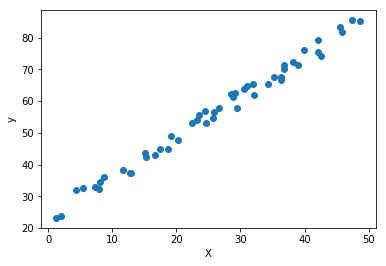

In [53]:
plt.scatter(inp, out)
plt.xlabel("X")
plt.ylabel("y")

In [54]:
X = tf.placeholder(dtype = tf.float32, shape = [None, 1])
y = tf.placeholder(dtype = tf.float32, shape = [None, 1])
weights = {}
W = tf.get_variable(dtype = tf.float32, name = "weight", shape = [1], initializer = tf.initializers.random_normal)
b = tf.get_variable(dtype = tf.float32, name = "bias", shape = [1], initializer = tf.initializers.random_normal)

ValueError: Variable weight already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-18-3656b024b7ee>", line 4, in <module>
    W = tf.get_variable(dtype = tf.float32, name = "weight", shape = [1], initializer = tf.initializers.random_normal)
  File "/home/vaibagga/.conda/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/home/vaibagga/.conda/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):


In [19]:
def getPrediction(W, X, b):
    return W*X + b

In [20]:
def loss(X, y):
    return tf.losses.mean_squared_error(getPrediction(X), y)

In [27]:
cost = tf.losses.mean_squared_error(W*X + b, y)
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
init = tf.global_variables_initializer()

In [48]:
with tf.Session() as sess:
    sess.run(init)
    for num_iter in range(100):
        sess.run(optimizer, feed_dict = {X: x, y: y})
        if num_iter % 10 == 0:
            cost = sess.run(cost, feed_dict = {X: x, y: y})
            print(cost)
        
        
    

TypeError: The value of a feed cannot be a tf.Tensor object. Acceptable feed values include Python scalars, strings, lists, numpy ndarrays, or TensorHandles.For reference, the tensor object was Tensor("Placeholder_7:0", shape=(?, 1), dtype=float32) which was passed to the feed with key Tensor("Placeholder_7:0", shape=(?, 1), dtype=float32).